# Overview analysis from Madrid

## Extract the description.

In [20]:
import json
import pandas as pd
import os

#Open the madrid coworkings csv
path = '/workspaces/Coworking/src/results/Madrid_coworking_spaces.json'

with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.json_normalize(data)

df_overview = df[['description']]

In [21]:
df_overview.head()

,description
0,Overview of WeWork Eloy Gonzalo 27\n***OPENING...
1,"Overview of Regus - Madrid, La Moraleja\nA mod..."
2,Overview of Regus - Madrid Pinar-Salamanca Dis...
3,"Overview of Regus - Madrid, Torre de Cristal\n..."
4,"Overview of Regus - Madrid, Avenida America\nM..."


## Show the important words from the descriptions.

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        word  frequency
1261    busi        202
6729    meet        201
6375  madrid        190
7578   offic        156
514     area        141
9586  servic        135
9274    room        131
6153   locat        131
7491   offer        123
1577   centr        118


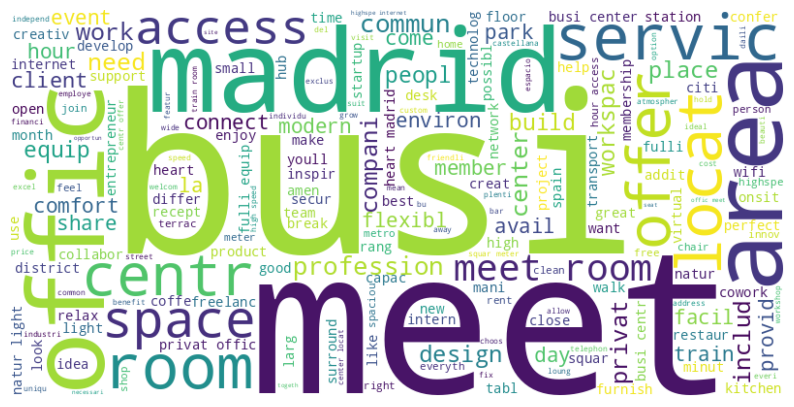

In [25]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download the NLTK stopwords if not already available
nltk.download('stopwords')

# Preprocessing the text and removing unwanted terms
def preprocess_text(text, custom_stopwords):
    # Convert to lowercase
    text = text.lower()
    
    # Remove unwanted terms/phrases like 'overview', 'regus madrid', 'regus'
    text = re.sub(r'\boverview\b|\bregus madrid\b|\bregus\b', '', text)  # \b for word boundaries
    
    # Remove special characters, digits and extra spaces (leave only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stopwords and perform stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in custom_stopwords]
    
    # Join the words back into a single string
    return ' '.join(words)

# Load your JSON data
with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Normalize the JSON to a DataFrame
df = pd.json_normalize(data)

# Define custom stopwords (add any words you consider irrelevant)
custom_stopwords = set(stopwords.words('english')) | {'space', 'office', 'work', 'coworking', 'room'}

# Apply preprocessing to each row in the 'overview' column
df['overview_cleaned'] = df['description'].apply(lambda x: preprocess_text(x, custom_stopwords))

# Step 2: Common Words Analysis
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # (1, 2) for unigrams and bigrams
X = vectorizer.fit_transform(df['overview_cleaned'])

# Get the most common words/bigrams
word_freq = X.toarray().sum(axis=0)
common_words = vectorizer.get_feature_names_out()

# Create a DataFrame to display the common words and their frequencies
word_freq_df = pd.DataFrame(zip(common_words, word_freq), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Print the top 10 most common words/bigrams
print(word_freq_df.head(10))

# Step 3: Visualize the Common Words (Word Cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(common_words, word_freq)))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


space              285
coworking          214
madrid             192
overview           185
business           185
offices            156
meeting            153
work               147
office             136
rooms              131
spaces             112
centre             107
working             92
meeting rooms       92
area                87
access              86
services            84
located             80
private             78
coworking space     72
dtype: int64


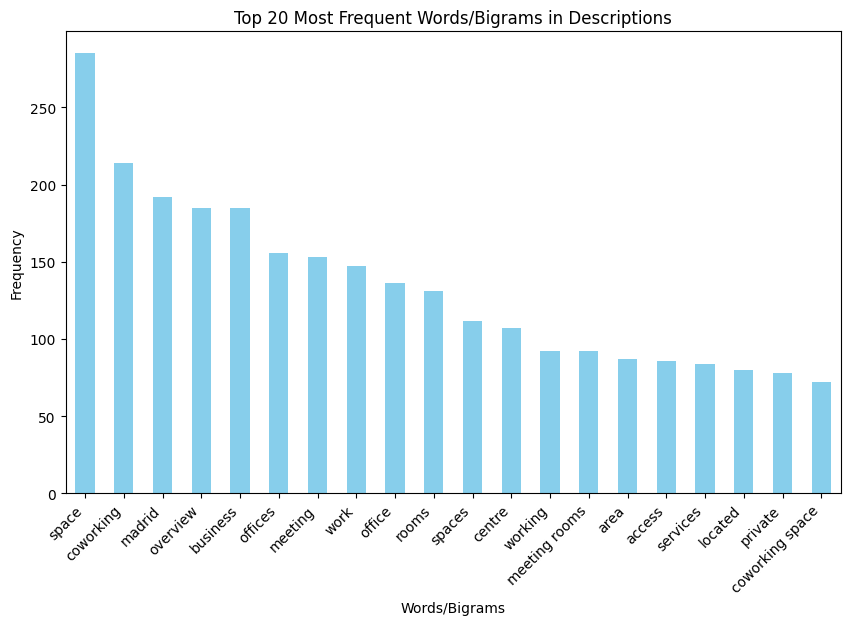

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Use CountVectorizer to extract word and bigram frequencies from the description
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=50)  # max_features to limit output
X = vectorizer.fit_transform(df['description'])  # Apply CountVectorizer to the 'description' column

# Convert the result into a dataframe for easier handling
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word/bigram
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Display the top 20 most frequent words and bigrams
top_words = word_freq_sum.head(20)
print(top_words)

# Visualize the frequencies of the top 20 words/bigrams
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words/Bigrams in Descriptions')
plt.xlabel('Words/Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


## Extract the price.

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/workspaces/Coworking/src/results/Madrid_coworking_spaces.csv")

df.head()

,url,name,address,description,amenities,price
0,https://www.coworker.com/spain/madrid/regus-ma...,Coworking Space: Regus - Madrid Financial Dist...,NaN,Overview of Regus - Madrid Financial District ...,NaN,Private Office\n from € 490\n/month
1,https://www.coworker.com/spain/madrid/regus-la...,"Coworking Space: Regus - LAS ROZAS, Las Rozas ...",NaN,"Overview of Regus - LAS ROZAS, Las Rozas\nThe ...",NaN,Private Office\n from € 189\n/month
2,https://www.coworker.com/spain/madrid/regus-ma...,"Coworking Space: Regus - Madrid, Ortega y Gass...",NaN,"Overview of Regus - Madrid, Ortega y Gasset\nT...",NaN,Private Office\n from € 315\n/month
3,https://www.coworker.com/spain/madrid/wework-e...,Coworking Space: WeWork Eloy Gonzalo 27 in Madrid,NaN,Overview of WeWork Eloy Gonzalo 27\n***OPENING...,NaN,Private Office\n from € 980\n/month
4,https://www.coworker.com/spain/madrid/regus-ma...,Coworking Space: Regus - Madrid Pinar-Salamanc...,NaN,Overview of Regus - Madrid Pinar-Salamanca Dis...,NaN,Private Office\n from € 225\n/month


In [3]:
import re

# Function to extract the price
def extract_price(text):
    if pd.isna(text):  # Handle missing values
        return None
    match = re.search(r'(\d+)', text)  # Extract the first number
    return int(match.group(1)) if match else None  # Convert to int if found

# Apply the function to the 'price' column
df['price_cleaned'] = df['price'].apply(extract_price)

# Display the results
print(df[['price', 'price_cleaned']])


                                   price  price_cleaned
0    Private Office\n from € 490\n/month          490.0
1    Private Office\n from € 189\n/month          189.0
2    Private Office\n from € 315\n/month          315.0
3    Private Office\n from € 980\n/month          980.0
4    Private Office\n from € 225\n/month          225.0
..                                   ...            ...
180    Private Office \nPrice on request            NaN
181    Private Office \nPrice on request            NaN
182    Private Office \nPrice on request            NaN
183    Private Office \nPrice on request            NaN
184                        1\n2\n3\n4\n5            1.0

[185 rows x 2 columns]


In [4]:
print(df['price_cleaned'].isna().sum())  # Count NaN values

14


In [5]:
median_price = df['price_cleaned'].median()
df['price_cleaned'].fillna(median_price, inplace=True)


/tmp/ipykernel_35302/1063067066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_cleaned'].fillna(median_price, inplace=True)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)  # Limit features to avoid overfitting
X_text = tfidf.fit_transform(df['description']).toarray()  # Convert to array

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Replace NaNs (if any remain) with the median
df['price_cleaned'].fillna(df['price_cleaned'].median(), inplace=True)

# Reshape price column and scale it
scaler = StandardScaler()
X_price = scaler.fit_transform(df[['price_cleaned']])

# Combine text and price features
X_combined = np.hstack((X_text, X_price))


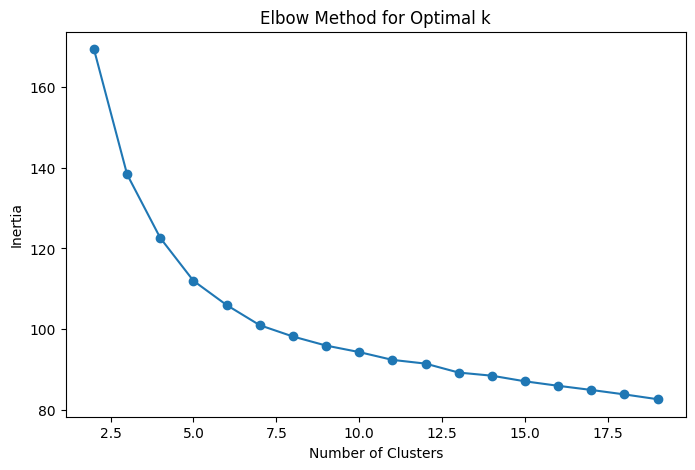

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(2, 20)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_combined)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [19]:
optimal_k = 13  # Choose based on elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_combined)

print(df[['name', 'price_cleaned', 'cluster']].head())  # Show results


                                                name  price_cleaned  cluster
0  Coworking Space: Regus - Madrid Financial Dist...          490.0        4
1  Coworking Space: Regus - LAS ROZAS, Las Rozas ...          189.0       12
2  Coworking Space: Regus - Madrid, Ortega y Gass...          315.0       12
3  Coworking Space: WeWork Eloy Gonzalo 27 in Madrid          980.0        5
4  Coworking Space: Regus - Madrid Pinar-Salamanc...          225.0       12


In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

# Add PCA components to DataFrame
df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]


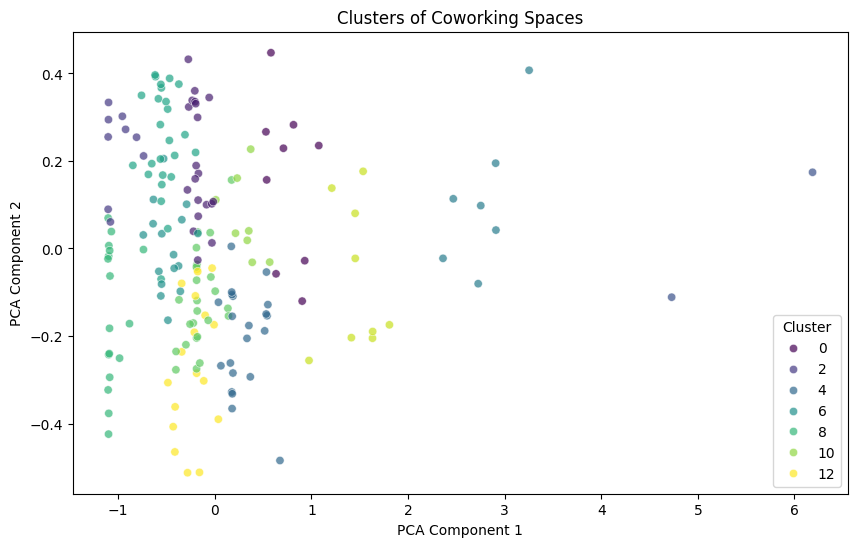

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca_x', y='pca_y', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Clusters of Coworking Spaces')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
